In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [2]:
import pandas as pd
output_path = '/Users/Hesham/dev/fluffDecoder/data/'
p = pd.read_csv(output_path + 'ST-1946093440_1.0.csv')

In [3]:
p = p.drop(['window'], axis=1).astype(float)


In [4]:
p.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1.538250e+09,-0.17,2.44,9.61,2.53,1.80,2.53,-0.06,0.08,0.05,...,7.0,3.0,7.0,67.0,70.0,0.0,0.0,35.0,3.0,7.0
1,1.538250e+09,-0.17,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.06,...,7.0,3.0,7.0,67.0,70.0,0.0,0.0,35.0,3.0,7.0
2,1.538250e+09,-0.16,0.03,9.61,0.03,1.76,0.03,-0.03,0.09,0.06,...,7.0,3.0,7.0,67.0,70.0,0.0,0.0,35.0,3.0,7.0
3,1.538250e+09,-0.16,0.03,9.61,0.03,1.76,0.03,-0.04,0.09,0.07,...,7.0,3.0,7.0,67.0,70.0,0.0,0.0,35.0,3.0,7.0
4,1.538250e+09,-0.16,0.03,9.62,0.03,1.76,0.03,-0.03,0.09,0.03,...,7.0,3.0,7.0,67.0,70.0,0.0,0.0,35.0,3.0,7.0


In [5]:
# y = p[['phq_1']]
# t1, t2 = train_test_split(p, stratify=y, test_size=0.5, random_state=42, shuffle=True)

In [6]:
len(t1.index)

47757

In [23]:
# train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [7]:
y = p[['phq_1']]
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)


# y = t1[['phq_1']]
# train_set_st, test_set_st = train_test_split(t1, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [8]:
train_set_st.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
90929,1.561061e+09,9.30,0.03,-3.18,0.03,1.75,0.03,-0.07,0.09,-0.05,...,1.0,0.0,8.0,26.0,26.0,0.0,660.0,0.0,7.0,7.0
42319,1.546785e+09,-9.69,0.03,-0.12,0.03,0.74,0.03,-0.03,0.10,-0.05,...,3.0,2.5,8.0,29.0,26.0,0.0,0.0,0.0,6.0,7.0
66454,1.551130e+09,-5.32,0.03,-7.62,0.03,-2.16,0.03,-0.07,0.25,-0.06,...,4.0,2.0,1.0,46.0,48.0,80.0,0.0,0.0,2.0,2.0
91444,1.561312e+09,-9.43,0.03,1.19,0.03,2.27,0.03,-0.05,0.09,-0.04,...,3.0,2.5,7.0,19.0,18.0,0.0,0.0,35.0,7.0,7.0
596,1.538329e+09,1.01,0.03,0.04,0.03,1.14,0.03,-0.05,0.24,-0.05,...,6.0,3.0,3.0,41.0,61.0,0.0,0.0,25.0,5.0,8.0


In [9]:
X_train_st = train_set_st.loc[:,'accX':'work_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
# y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'work_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
# y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [40]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
       'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood', 'tense', 'tired',
       'rumination', 'socialize', 'socialize_val', 'sport_time', 'work_time'],
      dtype='object')

In [10]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [11]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

In [12]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error')
regressor_st

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [14]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [15]:
regressor_st.best_params_

{'C': 1.5, 'epsilon': 0.1, 'tol': 0.001}

In [16]:
regressor_st.best_estimator_

LinearSVR(C=1.5, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.001, verbose=0)

In [17]:
from sklearn.metrics import mean_absolute_error

pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

0.8022252048887928

In [19]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.8008692776815883

In [20]:
model = regressor_st.best_estimator_

In [21]:
model.coef_

array([ 1.26923776e-02, -3.11759928e-02,  1.60089682e-02,  6.19537928e-03,
       -1.59039070e-03,  6.19537928e-03, -1.14298899e-02, -7.67728365e-02,
        3.54977533e-02, -9.01069810e-04,  8.30709380e-04,  6.03938357e-02,
        5.13069052e-02,  1.22303438e-02,  8.25508052e-02,  2.56062163e-02,
        2.13223644e-02,  1.81319047e-02, -2.02972265e-01,  1.98282446e-02,
       -3.05845803e-02,  1.17144638e-01, -1.84984509e-01, -1.84112381e-01,
        6.54557324e-02,  1.97092763e+00, -1.71859545e-01,  1.74769541e-01,
       -4.19060698e-02,  1.25691048e-01])

In [137]:
cvrs = regressor_st.cv_results_
for mean_score, params in zip(cvrs['mean_train_score'], cvrs['params']):
#     print(mean_score, params)

SyntaxError: unexpected EOF while parsing (<ipython-input-137-4f5e15d2ba2b>, line 3)

In [22]:
temp = p.columns[1:-2]

In [23]:
coef = model.coef_
for c, col in zip(coef, temp):
    print(c, col)

0.012692377630290266 accX
-0.031175992803945222 accX_std
0.016008968226547595 accY
0.006195379281999195 accY_std
-0.0015903907044607733 accZ
0.006195379281999195 accZ_std
-0.011429889861869517 gyrX
-0.07677283645676708 gyrX_std
0.035497753256351725 gyrY
-0.0009010698101870792 gyrY_std
0.0008307093802680609 gyrZ
0.06039383565361965 gyrZ_std
0.05130690516922616 heartR
0.012230343818597514 heartR_std
0.08255080522733782 AirTemperature
0.025606216313493635 AT_std
0.02132236437331202 AirPressure
0.01813190468786486 AP_std
-0.20297226522507844 PlethysmogramGreen
0.01982824463490814 ple_std
-0.030584580331859103 alc
0.11714463824535049 cig
-0.18498450912275372 mood
-0.1841123812007156 tense
0.06545573237111153 tired
1.9709276284000004 rumination
-0.1718595447042389 socialize
0.17476954061081149 socialize_val
-0.04190606980387449 sport_time
0.1256910481233881 work_time


In [24]:
patient = train_set_st.copy()

In [25]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
       'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood', 'tense', 'tired',
       'rumination', 'socialize', 'socialize_val', 'sport_time', 'work_time',
       'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

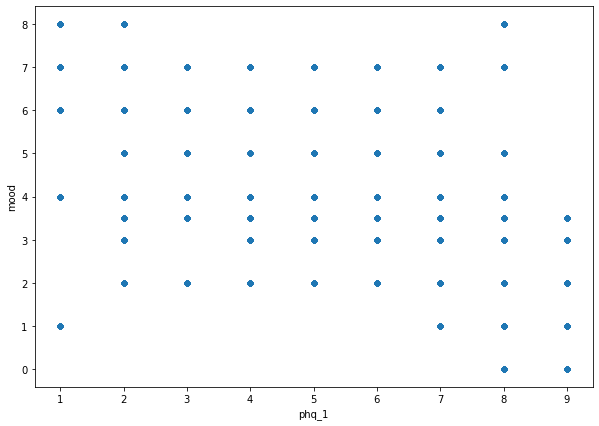

In [29]:
patient.plot(kind='scatter', x='phq_1', y='mood', figsize=(10,7))

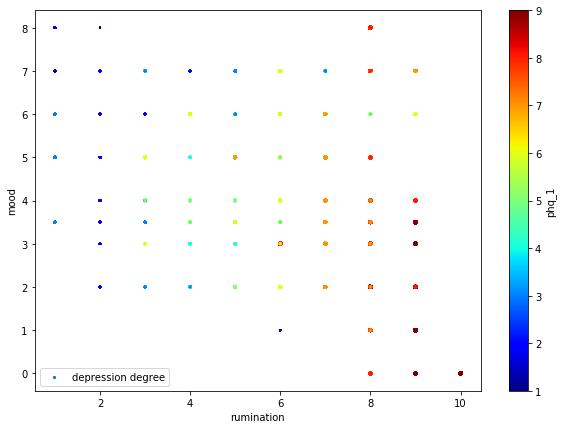

In [27]:
from matplotlib import pyplot

patient.plot(kind='scatter', x='rumination', y='mood', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

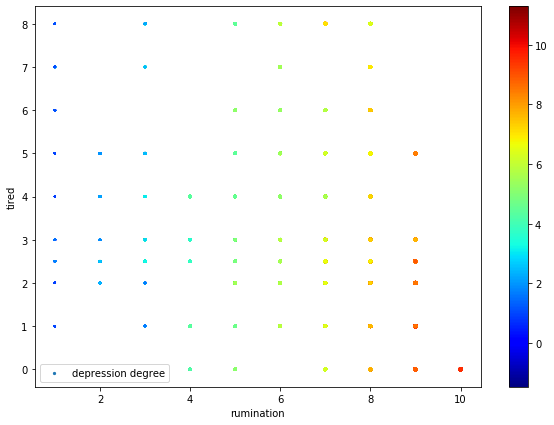

In [60]:
patient.plot(kind='scatter', x='rumination', y='tired', s=pred_train_st, label='depression degree', 
             c=pred_train_st, cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [59]:
patient.insert(1, "predictions", pred_train_st)

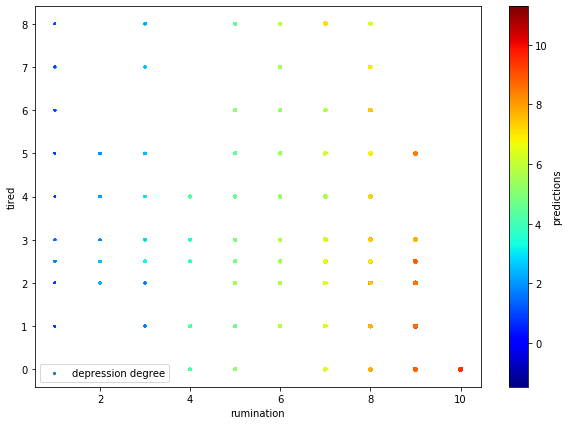

In [61]:
patient.plot(kind='scatter', x='rumination', y='tired', s=patient['predictions'], label='depression degree', 
             c='predictions', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [31]:
corr_matrix = patient.corr()

In [32]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                 1.000000
phq_2                 0.937178
rumination            0.851522
time                  0.406547
heartR                0.105712
day_sleep             0.074313
cig                   0.071070
AirTemperature        0.023838
accX_std              0.022536
accY_std              0.014058
accZ_std              0.014058
accZ                  0.012460
AT_std                0.010725
heartR_std            0.010448
gyrX_std              0.008182
gyrY_std              0.007955
ple_std               0.002555
gyrZ_std             -0.005122
PlethysmogramGreen   -0.011301
AP_std               -0.018625
gyrZ                 -0.024692
accY                 -0.032447
gyrX                 -0.038986
gyrY                 -0.044121
work_time            -0.044378
accX                 -0.092604
AirPressure          -0.133351
socialize_val        -0.179749
alc                  -0.198071
tired                -0.326769
sport_time           -0.328561
socialize            -0.419990
tense   

In [34]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
work_time_scaled = scaler_st.fit_transform(test_set_st[['work_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])
rumination_scaled = scaler_st.fit_transform(test_set_st[['rumination']])

In [35]:
time_sorted = time_st_test
time_sorted.sort()

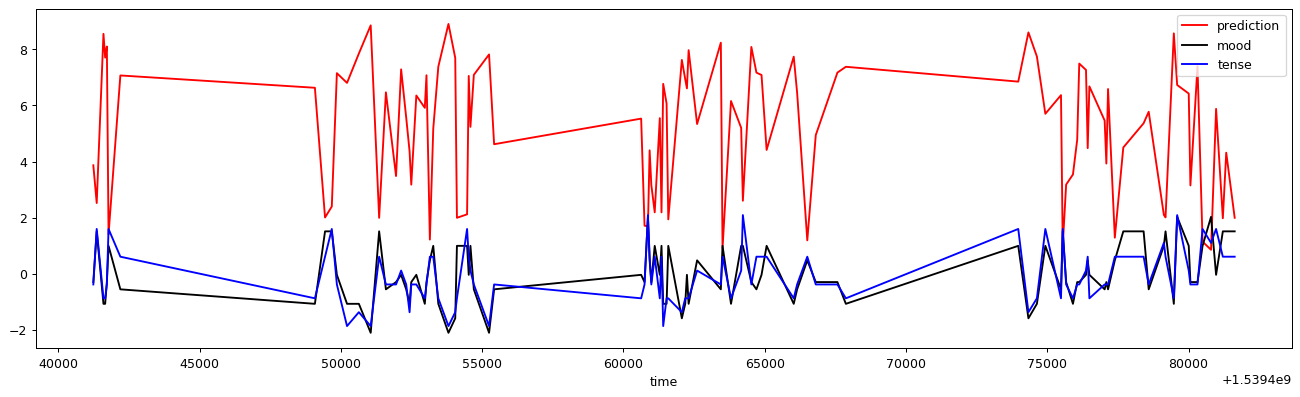

In [49]:
%matplotlib inline
s = 1000
e = 1100
xaxis = time_sorted[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = work_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]
yaxis8 = rumination_scaled[s:e]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
# pyplot.plot(xaxis, yaxis, color='magenta', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='red', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
pyplot.plot(xaxis, yaxis6, color='black', label='mood')
pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
# pyplot.plot(xaxis, yaxis8, color='blue', label='rumination')
# plt.ylabel('some numbers')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

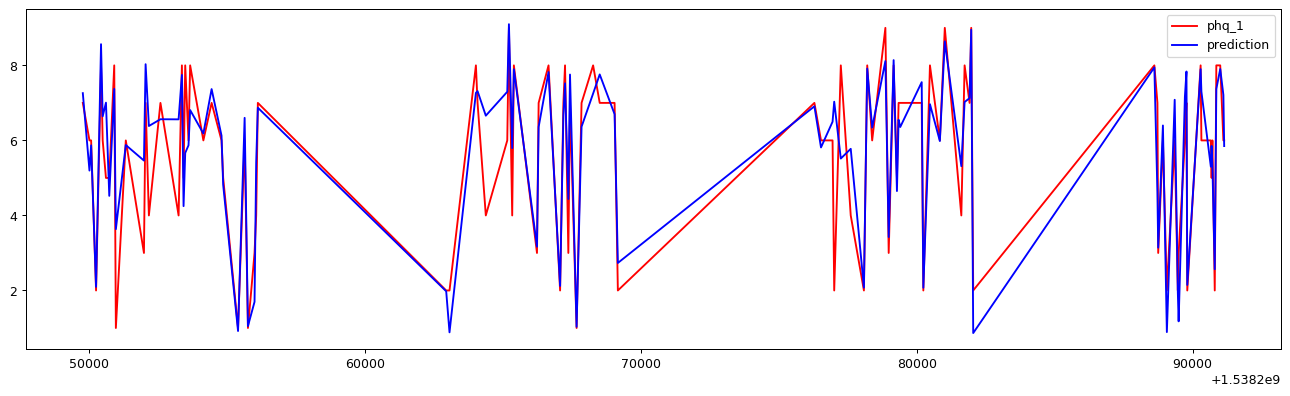

In [39]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:100]
yaxis = y_test_st_1[:100]
yaxis2 = pred_test_st[:100]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')